# Undirected Graphs

We need to implement two functions:
- Given an undirected graph and two distinct vertices 𝑢 and 𝑣, check if there is a path between 𝑢 and 𝑣 (path_exists)
- Given an undirected graph with 𝑛 vertices and 𝑚 edges, compute the number of connected components in it. (get_connected_components)

In [1]:
from collections import defaultdict 
import matplotlib.pyplot as plt
import networkx as nx
   
#This class represents a directed graph using adjacency list representation 
class Undirected_Graph: 
   
    def __init__(self,vertices): 
        self.V= vertices #No. of vertices 
        self.graph = defaultdict(list) # default dictionary to store graph. For each key a list is created 
   
    # function to add an edge to graph 
    def addEdge(self,u,v): 
        if v==None:
            self.graph[u] = []
        else:   
            self.graph[u].append(v)
            self.graph[v].append(u)
   
    # A function used by DFS 
    def DFSUtil(self,v,visited): 
        # Mark the current node as visited and print it 
        visited[v]= True
        print ("Exploring " + str(v)), 
        #Recur for all the vertices adjacent to this vertex 
        for i in self.graph[v]: 
            if visited[i]==False: 
                self.DFSUtil(i,visited) 
  
    
    # The function to do DFS traversal. It uses 
    # recursive DFSUtil() 
    def DFS(self, v): 
  
        # Mark all the vertices as not visited 
        visited = [False] * (self.V) 
  
        # Call the recursive helper function  
        # to print DFS traversal 
        self.DFSUtil(v, visited) 
    
    def BFS(self, v): 
  
        dist = [None] * (self.V) 
        dist[v] = 0
        q = [v]
        
        while q:
            u = q.pop(0)
            for i in self.graph[u]:
                if dist[i]==None:
                    q.append(i)
                    dist[i]=dist[u]+1
        
        for i in range(len(dist)):
            print("The shortest path from {} to {} has a length of {} ".format(v,i,dist[i]))
        return dist
         
        
        
    def draw_graph(self):
        #color_map = ["#F3AC71","#82C8F4","8CF371","F38471","#71B1F3"]
        G = nx.from_dict_of_lists(self.graph)
        nx.draw(G,with_labels=True,node_color="#F3AC71")
        plt.draw()
   
    def path_exists(self,u,v):
        visited = [False] * (self.V) 
        self.DFSUtil(u, visited)
        if visited[v]:
            return True
        return False
    
    def get_connected_components(self):
        visited = [False] * (self.V)
        ccomp = 0
        for i in range(self.V):
            if visited[i]==False:
                self.DFSUtil(i, visited)
                ccomp+=1
        return ccomp
            
  

The runtime of these functions is:
- path_exists has a runtime of $O(V + E)$ since it visits every vertex and edge from the selected vertex once
- get_connected_components: It wil have the same runtime as doing DFS for the whole graph, since the only different is that our function has an extra variable (ccomp). DFS has a runtime of $O(V + E)$ since it visits every vertex and edge once

Does a path exist between 1 and 3?
Exploring 1
Exploring 0
Exploring 2
False


How many connected components are?
Exploring 0
Exploring 1
Exploring 2
Exploring 3
2


Lets do a BFS from some vertex
The shortest path from 0 to 0 has a length of 0 
The shortest path from 0 to 1 has a length of 1 
The shortest path from 0 to 2 has a length of 2 
The shortest path from 0 to 3 has a length of None 


[0, 1, 2, None]

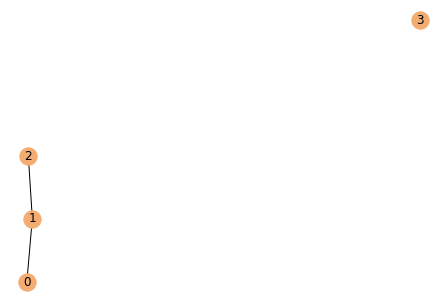

In [2]:
g = Undirected_Graph(4) 
g.addEdge(0, 1) 
g.addEdge(1, 2) 
g.addEdge(3, None) 
g.draw_graph()

print("Does a path exist between 1 and 3?")
print(g.path_exists(1,3))
print("\n")

print("How many connected components are?")
print(g.get_connected_components())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(0)

Does a path exist between 1 and 3?
Exploring 1
Exploring 0
Exploring 3
Exploring 2
True


How many connected components are?
Exploring 0
Exploring 1
Exploring 2
Exploring 3
1


Lets do a BFS from some vertex
The shortest path from 0 to 0 has a length of 0 
The shortest path from 0 to 1 has a length of 1 
The shortest path from 0 to 2 has a length of 2 
The shortest path from 0 to 3 has a length of 1 


[0, 1, 2, 1]

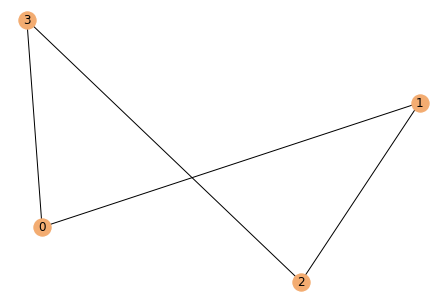

In [3]:
g = Undirected_Graph(4) 
g.addEdge(0,1) 
g.addEdge(1,2) 
g.addEdge(2,3)
g.addEdge(3,0)
g.draw_graph()

print("Does a path exist between 1 and 3?")
print(g.path_exists(1,3))
print("\n")

print("How many connected components are?")
print(g.get_connected_components())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(0)

Does a path exist between 1 and 3?
Exploring 1
Exploring 0
Exploring 3
Exploring 2
Exploring 4
Exploring 5
Exploring 6
True


How many connected components are?
Exploring 0
Exploring 1
Exploring 2
Exploring 3
Exploring 4
Exploring 5
Exploring 6
Exploring 7
Exploring 8
2


Lets do a BFS from some vertex
The shortest path from 0 to 0 has a length of 0 
The shortest path from 0 to 1 has a length of 1 
The shortest path from 0 to 2 has a length of 2 
The shortest path from 0 to 3 has a length of 1 
The shortest path from 0 to 4 has a length of 3 
The shortest path from 0 to 5 has a length of 4 
The shortest path from 0 to 6 has a length of 4 
The shortest path from 0 to 7 has a length of None 
The shortest path from 0 to 8 has a length of None 


[0, 1, 2, 1, 3, 4, 4, None, None]

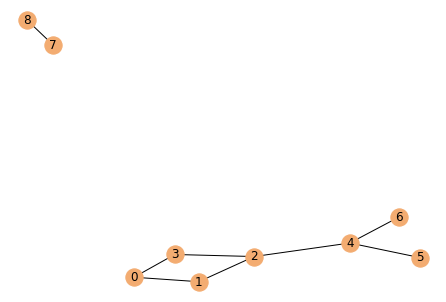

In [4]:
g = Undirected_Graph(9) 
g.addEdge(0,1) 
g.addEdge(1,2) 
g.addEdge(2,3)
g.addEdge(3,0)
g.addEdge(2,4)
g.addEdge(4,5)
g.addEdge(4,6)
g.addEdge(7,8)
g.draw_graph()

print("Does a path exist between 1 and 3?")
print(g.path_exists(1,3))
print("\n")

print("How many connected components are?")
print(g.get_connected_components())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(0)

Does a path exist between 1 and 3?
Exploring 1
Exploring 2
False


How many connected components are?
Exploring 0
Exploring 1
Exploring 2
Exploring 3
Exploring 4
4


Lets do a BFS from some vertex
The shortest path from 1 to 0 has a length of None 
The shortest path from 1 to 1 has a length of 0 
The shortest path from 1 to 2 has a length of 1 
The shortest path from 1 to 3 has a length of None 
The shortest path from 1 to 4 has a length of None 


[None, 0, 1, None, None]

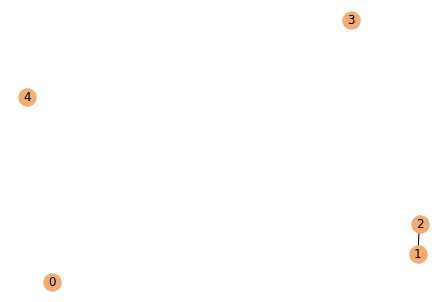

In [5]:
g = Undirected_Graph(5) 
g.addEdge(0,None) 
g.addEdge(1,2) 
g.addEdge(3,None)
g.addEdge(4,None)
g.draw_graph()

print("Does a path exist between 1 and 3?")
print(g.path_exists(1,3))
print("\n")

print("How many connected components are?")
print(g.get_connected_components())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(1)

# Directed Graphs

We need to implement three functions:
- Check whether a given directed graph with 𝑛 vertices and 𝑚 edges contains a cycle (contains_cycle)
- Compute a topological ordering of a given directed acyclic graph (DAG) with 𝑛 vertices and 𝑚 edges (topological_order)
- Compute the number of strongly connected components of a given directed graph with 𝑛 vertices and 𝑚 edges (get_SCC)

In [6]:
from collections import defaultdict 
import math
   
#This class represents a directed graph using adjacency list representation 
class Directed_Graph: 
   
    def __init__(self,vertices): 
        self.V= vertices #No. of vertices 
        self.graph = defaultdict(list) # default dictionary to store graph. For each key a list is created 
   
    # function to add an edge to graph 
    def addEdge(self,u,v): 
        if v==None:
            self.graph[u] = []
        else:   
            self.graph[u].append(v)
   
    def draw_graph(self):
        lis = []
        for i in g.graph:
            for j in g.graph[i]:
                lis.append((i,j))
        H = nx.DiGraph() 
        H.add_edges_from(lis) 
        #pos = nx.spring_layout(H,k=2)
        nx.draw(H,with_labels=True,node_color="#71B1F3")
        plt.draw()
        
    
        
    # A function used by DFS 
    def DFSUtil(self,v,visited): 
        # Mark the current node as visited and print it 
        visited[v]= True
        #print ("Exploring " + str(v)), 
        #Recur for all the vertices adjacent to this vertex 
        for i in self.graph[v]:
            if visited[i]==False: 
                self.DFSUtil(i,visited) 
  
    
    # The function to do DFS traversal. It uses 
    # recursive DFSUtil() 
    def DFS(self, v): 
        # Mark all the vertices as not visited 
        visited = [False] * (self.V) 
  
        # Call the recursive helper function  
        # to print DFS traversal 
        self.DFSUtil(v, visited) 
    
    def BFS(self, v): 
  
        dist = [None] * (self.V) 
        dist[v] = 0
        q = [v]
        
        while q:
            u = q.pop(0)
            for i in self.graph[u]:
                if dist[i]==None:
                    q.append(i)
                    dist[i]=dist[u]+1
        
        for i in range(len(dist)):
            print("The shortest path from {} to {} has a length of {} ".format(v,i,dist[i]))
            
        return dist
    
    def ContainsUtil(self,v,visited,stc): 
        # Mark the current node as visited and print it 
        
        visited[v]= True
        stc[v]=True
        
        #print ("Exploring " + str(v))
        
        for i in self.graph[v]:
            if stc[i]:
                return True
            if visited[i]==False: 
                if self.ContainsUtil(i,visited,stc):
                    return True
        stc[v]=False
        return False
        
    def contains_cycle(self):
        visited = [False] * (self.V)
        for i in range(self.V):
            stc = [False] * (self.V)
            if visited[i]==False: 
                if self.ContainsUtil(i, visited,stc):
                    return True
        return False
    
    def getTranspose(self): 
        h = Directed_Graph(self.V)
        not_app = list(range(self.V))
        for i in range(self.V):
            for j in self.graph[i]:
                h.graph[j].append(i)
                if j in not_app: not_app.remove(j)
        for i in not_app:
            h.addEdge(i,None)
        return h
    
    def order_by_posts(self,g,v,visited,posts): 
        # Mark the current node as visited and print it 
        visited[v]= True
        #print ("Exploring " + str(v)), 
        #Recur for all the vertices adjacent to this vertex 
        for i in g.graph[v]:
            if visited[i]==False: 
                self.order_by_posts(g,i,visited,posts)
                
        posts.insert(0,v)
        
        
    def DFS_scc(self,v,visited,lis): 
        # Mark the current node as visited and print it 
        visited[v]= True
        lis.append(v)
        #print ("Exploring " + str(v)), 
        
        for i in self.graph[v]:
            if visited[i]==False: 
                self.DFS_scc(i,visited,lis) 
                
    def get_SCC(self):
        scc = []
        posts = []
        # We do a DFS on the reverse graph in order to get the vertices
        # in order of posts. The vertex with the biggest post will be a
        # source SCC of the transpose and a sink SCC of the original
        g = self.getTranspose()
        visited = [False] * (g.V)
        for i in range(g.V):
            if visited[i]==False:
                self.order_by_posts(g,i, visited,posts)
        
        
        print(posts)
        
        # Once we have the vertices in order,we do a DFS to find out which
        # vertices belong to which SCC
        num_scc = 0
        visited = [False] * (self.V)
        
        for i in posts :
            if visited[i]==False:
                num_scc+=1
                vis_bef = visited.copy()
                lis=[]
                self.DFS_scc(i, visited,lis)
                scc.append(lis)
                
        print("There is/are {} strong connected components".format(num_scc))
        return scc
        
            
    def topological_sort(self):
        if self.contains_cycle():
            print ("Cannot be ordered, it is not a DAG")
            return
        
        # We need to find the sinks and put them at the end, i.e ordering
        # by post-visits. In DAGs we have as many SCC as num of vertices, so
        # what we are doing is sorting the SCCs really
        g = self.getTranspose()
        visited = [False] * (g.V)
        posts = []
        for i in range(g.V):
            if visited[i]==False:
                self.order_by_posts(g,i, visited,posts)
        
        posts = list(reversed(posts))
        return posts
        
        
  

The runtime of these functions is:
- contains_cycle has a runtime of $O(V + E)$ since it visits every vertex and edge once in the worst case.
- topological_order has a runtime of $O(V + E)$ since it is basically a DFS
- get_SCC has a runtime of $O(V + E)$ since it does two DFS

Does it contain a cycle?
True


How many SCCs does it have?
[0, 3, 2, 1]
There is/are 2 strong connected components
[[0, 1, 2], [3]]


Ordered linearly:
Cannot be ordered, it is not a DAG
None


Lets do a BFS from some vertex
The shortest path from 0 to 0 has a length of 0 
The shortest path from 0 to 1 has a length of 1 
The shortest path from 0 to 2 has a length of 2 
The shortest path from 0 to 3 has a length of None 


[0, 1, 2, None]

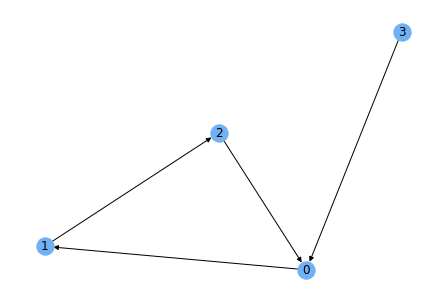

In [7]:
g = Directed_Graph(4) 
g.addEdge(0, 1) 
g.addEdge(1, 2) 
g.addEdge(2, 0) 
g.addEdge(3, 0) 

g.draw_graph()

print("Does it contain a cycle?")
print(g.contains_cycle())
print("\n")

print("How many SCCs does it have?")
print(g.get_SCC())
print("\n")

print("Ordered linearly:")
print(g.topological_sort())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(0)

Does it contain a cycle?
False


How many SCCs does it have?
[4, 3, 2, 1, 0]
There is/are 5 strong connected components
[[4], [3], [2], [1], [0]]


Ordered linearly:
[0, 1, 2, 3, 4]


Lets do a BFS from some vertex
The shortest path from 0 to 0 has a length of 0 
The shortest path from 0 to 1 has a length of 1 
The shortest path from 0 to 2 has a length of 1 
The shortest path from 0 to 3 has a length of 1 
The shortest path from 0 to 4 has a length of 2 


[0, 1, 1, 1, 2]

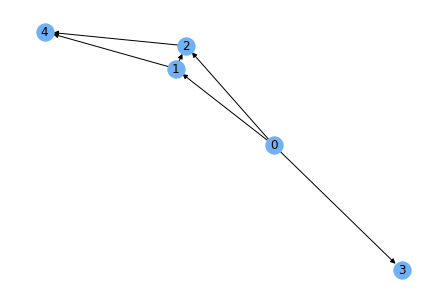

In [8]:
g = Directed_Graph(5) 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(0, 3) 
g.addEdge(1, 4)
g.addEdge(1, 2)
g.addEdge(2, 4)
g.addEdge(3, None)
g.addEdge(4, None)


g.draw_graph()

print("Does it contain a cycle?")
print(g.contains_cycle())
print("\n")

print("How many SCCs does it have?")
print(g.get_SCC())
print("\n")

print("Ordered linearly:")
print(g.topological_sort())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(0)

Does it contain a cycle?
False


How many SCCs does it have?
[0, 3, 1, 2, 4]
There is/are 5 strong connected components
[[0], [3], [1], [2], [4]]


Ordered linearly:
[4, 2, 1, 3, 0]


Lets do a BFS from some vertex
The shortest path from 0 to 0 has a length of 0 
The shortest path from 0 to 1 has a length of None 
The shortest path from 0 to 2 has a length of None 
The shortest path from 0 to 3 has a length of None 
The shortest path from 0 to 4 has a length of None 


[0, None, None, None, None]

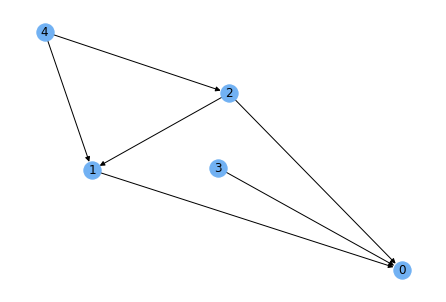

In [9]:
g = Directed_Graph(5) 
g.addEdge(0, 1) 
g.addEdge(0, 2) 
g.addEdge(0, 3) 
g.addEdge(1, 4)
g.addEdge(1, 2)
g.addEdge(2, 4)
g.addEdge(3, None)
g.addEdge(4, None)
g = g.getTranspose()

g.draw_graph()


print("Does it contain a cycle?")
print(g.contains_cycle())
print("\n")

print("How many SCCs does it have?")
print(g.get_SCC())
print("\n")

print("Ordered linearly:")
print(g.topological_sort())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(0)

Does it contain a cycle?
True


How many SCCs does it have?
[3, 5, 4, 2, 1, 0]
There is/are 4 strong connected components
[[3, 4, 5], [2], [1], [0]]


Ordered linearly:
Cannot be ordered, it is not a DAG
None


Lets do a BFS from some vertex
The shortest path from 0 to 0 has a length of 0 
The shortest path from 0 to 1 has a length of 1 
The shortest path from 0 to 2 has a length of 2 
The shortest path from 0 to 3 has a length of 1 
The shortest path from 0 to 4 has a length of 2 
The shortest path from 0 to 5 has a length of 3 


[0, 1, 2, 1, 2, 3]

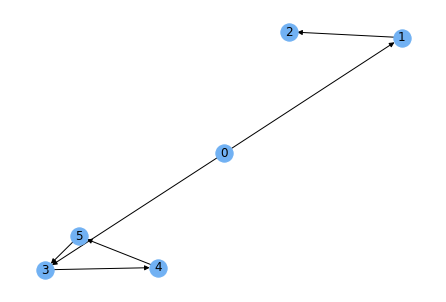

In [10]:
g = Directed_Graph(6) 
g.addEdge(0, 1) 
g.addEdge(1, 2) 
g.addEdge(0, 3) 
g.addEdge(3, 4)
g.addEdge(4, 5)
g.addEdge(5, 3)
g.addEdge(2, None)

g.draw_graph()

print("Does it contain a cycle?")
print(g.contains_cycle())
print("\n")

print("How many SCCs does it have?")
print(g.get_SCC())
print("\n")

print("Ordered linearly:")
print(g.topological_sort())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(0)

Does it contain a cycle?
True


How many SCCs does it have?
[2, 1, 0, 3, 6, 5, 4]
There is/are 5 strong connected components
[[2], [1], [0], [3, 4, 5], [6]]


Ordered linearly:
Cannot be ordered, it is not a DAG
None


Lets do a BFS from some vertex
The shortest path from 3 to 0 has a length of 1 
The shortest path from 3 to 1 has a length of 2 
The shortest path from 3 to 2 has a length of 3 
The shortest path from 3 to 3 has a length of 0 
The shortest path from 3 to 4 has a length of 1 
The shortest path from 3 to 5 has a length of 2 
The shortest path from 3 to 6 has a length of None 


[1, 2, 3, 0, 1, 2, None]

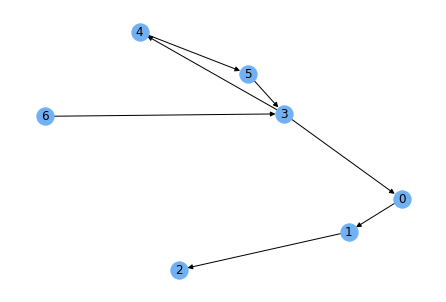

In [11]:
g = Directed_Graph(7) 
g.addEdge(0, 1) 
g.addEdge(1, 2) 
g.addEdge(3, 0) 
g.addEdge(3, 4)
g.addEdge(4, 5)
g.addEdge(6, 3)
g.addEdge(5, 3)

g.addEdge(2, None)

g.draw_graph()

print("Does it contain a cycle?")
print(g.contains_cycle())
print("\n")

print("How many SCCs does it have?")
print(g.get_SCC())
print("\n")

print("Ordered linearly:")
print(g.topological_sort())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(3)



Does it contain a cycle?
False


How many SCCs does it have?
[2, 5, 4, 3, 1, 0]
There is/are 6 strong connected components
[[2], [5], [4], [3], [1], [0]]


Ordered linearly:
[0, 1, 3, 4, 5, 2]


Lets do a BFS from some vertex
The shortest path from 0 to 0 has a length of 0 
The shortest path from 0 to 1 has a length of 1 
The shortest path from 0 to 2 has a length of 2 
The shortest path from 0 to 3 has a length of 1 
The shortest path from 0 to 4 has a length of 2 
The shortest path from 0 to 5 has a length of 2 


[0, 1, 2, 1, 2, 2]

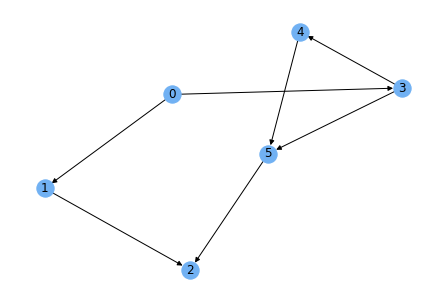

In [12]:
g = Directed_Graph(6) 
g.addEdge(0, 1) 
g.addEdge(1, 2) 
g.addEdge(0, 3) 
g.addEdge(3, 4)
g.addEdge(4, 5)
g.addEdge(3, 5)
g.addEdge(5, 2)
g.addEdge(2, None)

g.draw_graph()

print("Does it contain a cycle?")
print(g.contains_cycle())
print("\n")

print("How many SCCs does it have?")
print(g.get_SCC())
print("\n")

print("Ordered linearly:")
print(g.topological_sort())
print("\n")

print("Lets do a BFS from some vertex")
g.BFS(0)